# Alunos:

### Carlos Eduardo Fontaneli

In [1]:
# Importando bibliotecas necessárias
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

### Leitura dos dados

Os dados foram retirados desse link (http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/), sendo eles relativos a qualidade de vinhos tintos.

In [2]:
data = pd.read_csv('./winequality-red.csv', sep=';') 
data.drop('quality', 1, inplace=True) # retirando a coluna da classe
data

/tmp/ipykernel_117321/3988833303.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('quality', 1, inplace=True) # retirando a coluna da classe


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Normalização dos dados

Como o dataset utilizado é composto apenas por atributos contínuos faz-se necessário a normalização de seus dados.

In [3]:
scaler = MinMaxScaler()
scaler.fit(data)

data_transformed = scaler.transform(data)
data_transformed

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

### Aplicação do k-means e cálculo da soma dos quadrados da distância

Abaixo segue o código da aplicação do algoritmo k-means para k em um intervalo de [1, 14], onde para cada k é calculada a soma dos quadrados da distância entre cada cluster para futura análise de melhor valor para k.

In [4]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

### Gráfico das distância

Segue o gráfico da soma dos quadrados das distâncias para a análise através do método do cotovelo.

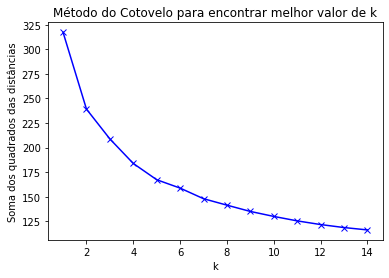

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

### Análise com método do cotovelo

Conforme é possível observar no gráfico acima, a soma dos quadrados das distâncias começar a deixar de ter uma diminuição significativa a partir de 4 clusters, sendo que, a partir de 6 clusters a queda é ainda mais amena, portanto isso mostra uma revelância menor no aumento da quantidade de clusters a partir desse intervalo. Dessa forma, os melhores valor de k-clusters(número de grupos) ficam dentro do intervalo [4, 6].